# Példa 1.3

A C végkeresztmetszet és a fal közötti hézag $0{,}15\, \rm{mm}$ az alábbi feladatnál látható hengeres tömör rudakból álló szerkezetnél a terheletlen állapotban. A terhelés nagysága $P=300\, \rm{kN}$. Határozzuk meg a falakban ébredő reakcióerőket a terhelés alkalmazásakor. Mekkora az egyes részek hosszváltozása és a bennük ébredő feszültség? Az anyag rugalmassági modulusza $70 \, \rm{GPa}$.

<img src="1.3.png" style="width: 400px;">

# Megoldás

A megoldás során szimbolikus számításokat fogunk végezni (azaz a konkrét értékeket csak a végén helyettesítjük be, előtte a képleteket írjuk fel és rendezzük át). Ehhez szükségünk van a `sympy` modulra.

In [1]:
import sympy as sp #betöltjük a sympy modul összes függvényét, és sp-ként hivatkozunk rá:
# ami függvényt a sympyból használunk azt sp.függvény formában hívjuk meg

Definiálnunk kell a később haszált szimbólumokat. Az átláthatóság kedvéért mi most a kód legelején definiáljuk őket.

A szintaktika: `valtozonev = sp.symbols("kiirt_nev")`. A programkódban a szimbólumra a `valtozonev`-vel hivatkozunk. A `"kiirt_nev"` (a " kell az elejére és végére) az a karaktersor, amit kiír a program, mint a szimbólum neve, amikor ki akarunk íratni egy végeredményt. A `valtozonev` és `"kiirt_nev"` gyakorlatilag bármi lehet, de célszerű, hogy megegyezzenek.

Egy sorban több szimbólumot is definiálhatunk a lent bemutatott szintaktikával. A `"kiirt_nev"`-ben az egyes változók nevét szóközzel vagy vesszővel választjuk el. Emiatt egy szimbólum neve sem tartalmazhatja ezeket az elválasztó karaktereket!

In [2]:
P, FA, Δ, d1, d2, L1, L2, E = sp.symbols("P, F_A, Δ, d1, d2, L1, L2, E")
# Δ: \Delta + tab

A feladat megad néhány konkrét értéket, amit később behelyettesíthetünk. Ezeket az átláthatóság kedvéért itt, a feladat elején definiáljuk. Az adatokat a $\rm{mm - N - MPa}$ mértékegységeknek megfelelően adjuk meg.

In [3]:
P_adat = 300000 # N
Δ_adat = 0.15 # mm
d1_adat = 50 # mm
d2_adat = 25 # mm
L1_adat = 600 # mm
L2_adat = 600 # mm
E_adat = 70000 # MPa

Hogy később egyszerűbben helyettesíthessünk be, készítsük el az ezt segítő listát a `(szimbolum, adat)` párokból.

Megjegyzés: az nem okoz hibát, ha egy kifejezésbe olyan szimbólumot (is) be akarunk helyettesíteni, ami nem szerepel a kifejezésben.

In [4]:
adatok = [(P,P_adat),(Δ,Δ_adat),(d1,d1_adat),(d2,d2_adat),(L1,L1_adat),(L2,L2_adat),(E,E_adat)]

Írjuk fel a két keresztmetszet területét. A $\pi$-t `sp.pi`-ként tudjuk beírni. Figyeljünk arra, hogy a hatványozás jele `**`!

In [5]:
A1 = d1**2*sp.pi/4
A2 = d2**2*sp.pi/4

Írjuk fel az AB illetve BC szakaszokon a normálerő kifejezését!

$$N_{AB}=-F_A,$$

$$N_{BC}=-F_A-P=F_B.$$


In [6]:
N_AB = -FA
N_BC = -FA-P
FB = N_BC

A terhelés elég nagy ahhoz, hogy a jobb oldali falat nyomja a szerkezet jobb vége, így az AB és BC szakaszok nyúlásának összege megegyezik a $\Delta$ hézag méretével.

$$\Delta L = \frac{F L}{A E}.$$

A következő egyenletet írhatjuk:
$$\frac{N_{AB} L_{1}}{A_{1}E}+\frac{N_{BC} L_{2}}{A_{2}E}=\Delta.$$

Ebben az egyetlen ismeretlen a két normálerő kifejezésében szereplő $F_A$. Ezt kifejezhetnénk kézzel is az egyenletből. Ehelyett használjuk a `sympy`-t az átrendezésre! Ezt úgy tudjuk megtenni, hogy a fenti egyenletet gyakorlatilag megoldjuk $F_A$-ra. Erre az `sp.solve()` függvényt használhatjuk.

Most a `solve()` legegyszerűbb szintaktikáját fogjuk használni: `solve(egyenlet, ismeretlen)`. Az egyenleteket a `sympy`-ban 0-ra rendezve adjuk meg, azaz
$$\frac{N_{AB} L_{1}}{A_{1}E}+\frac{N_{BC} L_{2}}{A_{2}E}-\Delta=0$$

alakban. Azért kell megadnunk, hogy mire oldjuk meg az egyenletet, mert a `sympy` nem "tudja", hogy a többi szimbólum valójában ismert mennyiségeket jelöl.

Vigyük be az egyenletet, fejezzük ki $F_A$-t!

In [7]:
egyenl = N_AB*L1/A1/E + N_BC*L2/A2/E - Δ # bevisszük az egyenletet
kifej = sp.solve(egyenl,FA) # kifejezzük a 'solve()' segítségével FA-t

Írjuk ki a végeredményt!

Megjegyzés: Ennek a cellának az első sora alapállapotba hoz egy beállítást, amit később át fogunk állítani. Ez a sor csupán azért kell, hogy újrafuttatáskor ugyan azt kapjuk, mint az első futtatáskor. Ezt normál esetben nem kell megtenni, itt is csak demonstrációs célokat szolgál.

In [8]:
sp.init_printing(pretty_print=False) # ez valójában nem kell ide
kifej # kiírjuk

[-d1**2*(pi*E*d2**2*Δ/4 + L2*P)/(L1*d2**2 + L2*d1**2)]

Két dolgot vehetünk észre: egyrészt nehezen olvashaó az eredmény, kód-szerű formátumban kapjuk. Másrészt a kifejezés `[]`-ben van. Ez arról árulkodik, hogy egy listát kaptunk vissza.

Az olvashatóságot nagyban javítja, ha használjuk az `sp.init_printing()` beállítást (ezt kapcsoltuk ki az előbb, alapból sincs bekapcsolva). Bármilyen ez után futtatott cellának az eredményét "szépen" fogjuk megkapni (ha újrafuttatunk egy korábbi cellát, azt is).

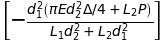

In [9]:
sp.init_printing() # bekapcsoljuk a "szép" kiíratást
kifej # kiírjuk

Az eredmény továbbra is egy listában van (aminek ez az egyetlen eleme), hogy később egyszerűbben tudjuk használni, ki kell szednünk a listából. A lista első elemét a 0-s sorszámmal - pontosabban indexszel - érjük el. Ehhez a `lista[0]` szintaktikát használjuk. (A programozásban 0-tól indexelünk, ezt minden normális programnyelv betartja. <font color='white'>Looking at you, MATLAB...</font>)

Megjegyzés: azért listában kapjuk az eredményt, mert a `solve()` képes kezelni több egyenletet/ismeretlent. Ekkor gyakran több megoldást is kapunk, amiket egy listába kell tenni, hogy vissza tudjuk kapni.

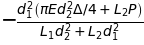

In [10]:
elem = kifej[0] # kiszedjük a lista első elemét és betesszük az 'elem' változóba
elem # kírjuk

Most már egyszerűen tudjuk használni $F_A$-nak a kifejezését. Itt minden szimbólum ismert mennyiség, végezzük el a behelyettesítést a `.subs()` segítségével!

In [11]:
FAeredmeny = elem.subs(adatok)
FAeredmeny

Végezzük el a numerikus kiértékelést 10 értékesjegyre!

In [12]:
FAeredmeny.evalf(10) # N

Ez az A pontban ébredő reakcióerő. A C-beli reakcióerő megegyezik $F_B$-vel, amit a korábban felírtak alapján $F_B=-P-F_A$-ként számíthatunk.

In [13]:
FBeredmeny = -FAeredmeny-P_adat # most egyből beírjuk az adatot, mert 'FAeredmeny'-be már behelyettesítettünk
FBeredmeny.evalf(10) # N; kiértékel 10 értékesjegyre

Az alakváltozásokat a korábban felírt módon számítjuk:
$$\Delta L = \frac{F L}{A E}.$$

Az `A1` és `A2` nem egyszerű szimbólumok, hanem kifejezések. Emiatt nem írhatjuk az összes szimbólum helyére a neki megfelelő adatot, hanem be kell helyettesítenünk. Egy összetettebb kifejezésbe behelyettesíthetünk a `.subs()`-al, de ekkor zárójelbe kell tennünk a kifejezést, hogy "tudja" a fordító, hogy az egész kifejezésbe szeretnénk behelyettesíteni, nem csak a kifejezésben szereplő utolsó változóba.

$F_A$ negatív előjelet kap, mert $N_{AB}$ kifejezésésben negatív előjellel szerepel.

In [14]:
ΔL1 = (-FAeredmeny*L1/A1/E).subs(adatok) # számolás, behelyettesítés
ΔL1.evalf(5) #mm; kiértékelés 5 értékesjegyre

In [15]:
ΔL2 = (FBeredmeny*L2/A2/E).subs(adatok) # számolás, behelyettesítés
ΔL2.evalf(5) #mm; kiértékelés 5 értékesjegyre

A feszültségek a $\sigma=\frac{N}{A}$-nak megfelelően számíthatók. Az általunk használt mértékegységeknek megfelelően az eredményt $\rm{MPa}$-ban kapjuk.

In [16]:
σ1 = (-FAeredmeny/A1).subs(adatok)
σ1.evalf(5) # MPa

In [17]:
σ2 = (FBeredmeny/A2).subs(adatok)
σ2.evalf(5) # MPa